In [342]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import csv
import pandas as pd
import scipy
import seaborn as sns
import scipy.stats as st

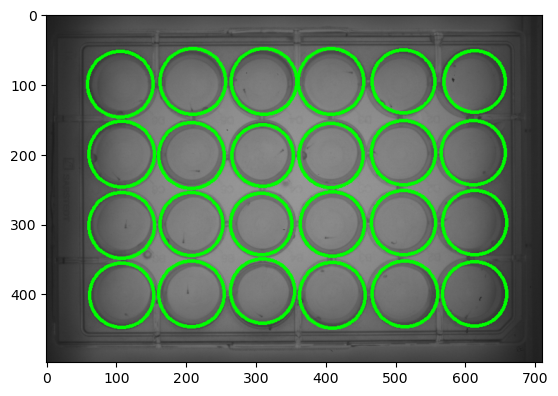

In [354]:
image=cv2.imread('C:\\Data\\Behaviour2022\\22-10-25_4 dpf wt_11 am-cropped.tif')
output=image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,
                           minDist=70,
                           dp=1,
                           param1=60,
                           param2=30,
                           minRadius=43,
                           maxRadius=48)
circles = np.round(circles[0, :]).astype("int")
for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        
plt.imshow(output)

In [355]:
data=pd.read_csv('C:\\Data\\Behaviour2022\\22-10-25_4_dpf_wt_11_am_spots.csv')
data

C:\Users\au691573\AppData\Local\Temp\ipykernel_27540\1606052360.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('C:\\Data\\Behaviour2022\\22-10-25_4_dpf_wt_11_am_spots.csv')


,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,...,ELLIPSE_Y0,ELLIPSE_MAJOR,ELLIPSE_MINOR,ELLIPSE_THETA,ELLIPSE_ASPECTRATIO,AREA,PERIMETER,CIRCULARITY,SOLIDITY,SHAPE_INDEX
0,Label,Spot ID,Track ID,Quality,X,Y,Z,T,Frame,Radius,...,Ellipse center y0,Ellipse long axis,Ellipse short axis,Ellipse angle,Ellipse aspect ratio,Area,Perimeter,Circularity,Solidity,Shape index
1,Label,Spot ID,Track ID,Quality,X,Y,Z,T,Frame,R,...,El. y0,El. long axis,El. sh. axis,El. angle,El. a.r.,Area,Perim.,Circ.,Solidity,Shape index
2,NaN,NaN,NaN,(quality),(pixel),(pixel),(pixel),(frame),NaN,(pixel),...,(pixel),(pixel),(pixel),(radians),NaN,(pixel^2),(pixel),NaN,NaN,NaN
3,ID32932,32932,0,14.0,438.7608695652174,80.39855072463769,0.0,0.0,0,1.913259964331453,...,0.1604127016513412,3.399792200687851,1.4533652040163807,0.41210906719199253,2.339255261714338,11.5,15.186912597118445,0.6265687306599079,0.92,4.478376202545185
4,ID32933,32933,1,11.0,286.4166666666667,106.41666666666667,0.0,0.0,0,1.9544100476116797,...,0.5833333333333289,4.330127018922197,1.767766952966368,1.1071487177940904,2.4494897427831814,12.0,16.449659909380486,0.5572848837613935,1.0,4.748607788379309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353816,ID410109,410109,9.0,10.0,131.253623,203.76087,0.0,18023.0,18023,1.91326,...,-0.071062,3.77571,1.355786,1.378805,2.784886,11.5,17.446973,0.474753,0.884615,5.144832
353817,ID410106,410106,3.0,19.0,505.722222,81.747863,0.0,18023.0,18023,2.491394,...,0.195869,4.760667,1.955613,-1.388675,2.434361,19.5,20.807223,0.566,1.0,4.711908
353818,ID410107,410107,2.0,4.0,135.1,124.3,0.0,18023.0,18023,1.261566,...,0.140797,3.52273,1.039602,0.07619,3.388537,5.0,10.605551,0.558616,1.0,4.742947
353819,ID410104,410104,1.0,16.0,332.813725,68.813725,0.0,18023.0,18023,2.326213,...,0.259372,4.254652,1.757064,1.339181,2.421456,17.0,19.717301,0.549495,0.944444,4.782148


In [356]:
x_position=data[['POSITION_X','POSITION_Y']][3:]
positions=x_position.to_numpy(np.float16).astype(int)
dist = scipy.spatial.distance_matrix(positions,circles[:,0:2],2)
wells=dist<circles[:,2]
well_id=np.argmax(wells,axis=1)
wells_dist=dist[wells]

In [357]:
well_counts=np.zeros((2,24))
for well_nb in range(0,24):    
    temp=wells_dist[np.where(well_id[np.any(wells,axis=1)]==well_nb)]
    well_counts[0,well_nb]=np.count_nonzero(temp<=circles[well_nb,2]/2)
    well_counts[1,well_nb]=np.count_nonzero(temp>circles[well_nb,2]/2)

C:\Users\au691573\AppData\Local\Temp\ipykernel_27540\2176986986.py:1: RuntimeWarning: invalid value encountered in true_divide
  well_proba=well_counts/np.sum(well_counts,axis=0)


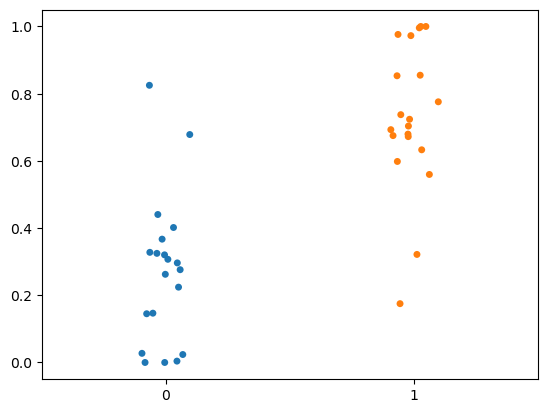

In [360]:
well_proba=well_counts/np.sum(well_counts,axis=0)
sns.stripplot(np.transpose(well_proba))
np.savetxt('C:\\Data\\Behaviour2022\\22-10-25_4dpfWT11am.txt',well_counts,fmt='%f')

In [361]:
HistCount=np.zeros(gray.shape)
for (x,y) in positions:
    HistCount[y,x]=HistCount[y,x]+1

<function matplotlib.pyplot.show(close=None, block=None)>

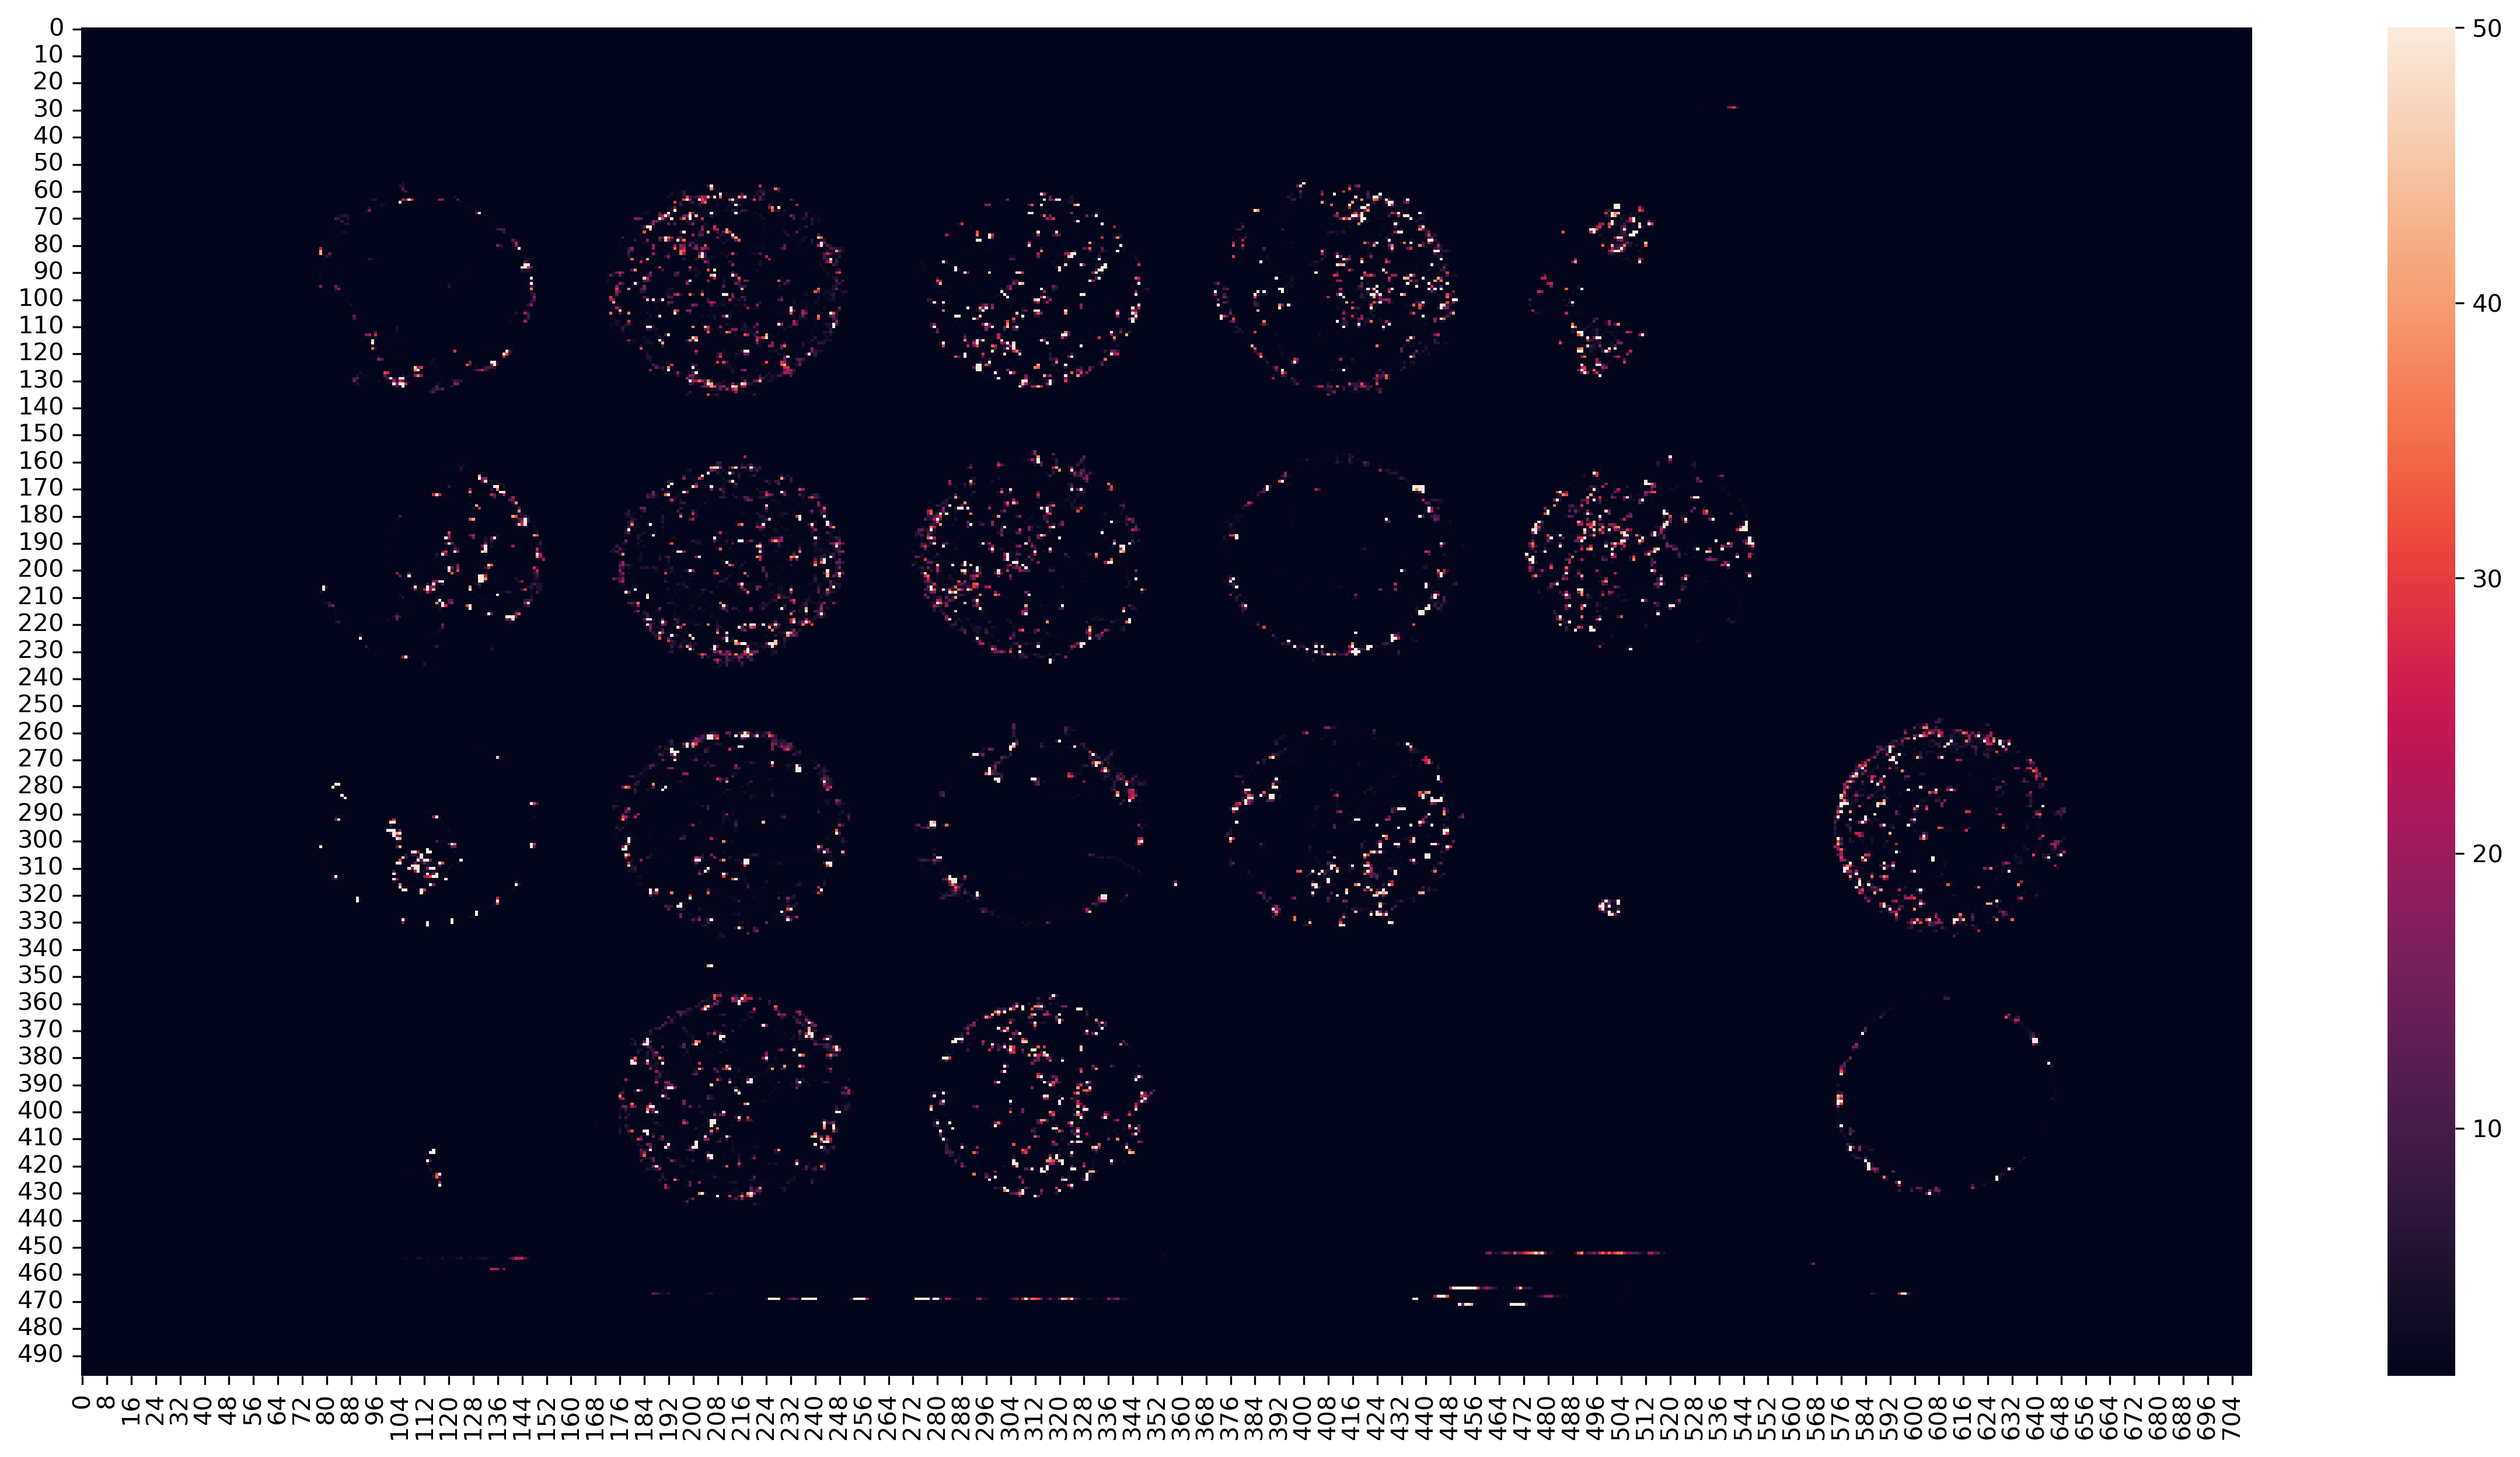

In [364]:
plt.figure(figsize=(20, 10), dpi=300)
sns.heatmap(HistCount,vmin=1,vmax=50)
plt.show

In [365]:
positions[:,0].max()

649

In [366]:
positions[:,0]=positions[:,0]-60
positions[:,1]=positions[:,1]-50

In [375]:
kde_img=np.zeros((600,400))
for x_nb in range(0,6):
    for y_nb in range(0,4):
        xmin=(x_nb)*100
        xmax=(x_nb+1)*100
        ymin=(y_nb)*100
        ymax=(y_nb+1)*100
        x=positions[(positions[:,1]<=ymax) & (positions[:,0]<=xmax) & (positions[:,1]>=ymin) & (positions[:,0]>=xmin),0]
        y=positions[(positions[:,1]<=ymax) & (positions[:,0]<=xmax) & (positions[:,1]>=ymin) & (positions[:,0]>=xmin),1]
        xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
        positions_kde = np.vstack([xx.ravel(), yy.ravel()])
        if len(x)>50:
            values = np.vstack([x, y])
            kernel = st.gaussian_kde(values)
            f = np.reshape(kernel(positions_kde).T, xx.shape)
            kde_img[xmin:xmax,ymin:ymax]=f/f.max()

<function matplotlib.pyplot.show(close=None, block=None)>

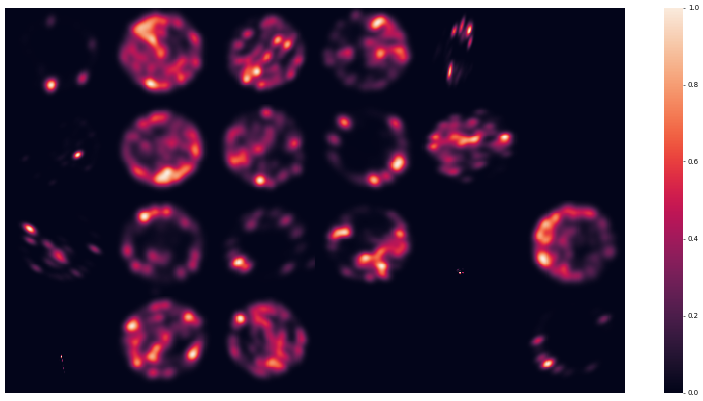

In [378]:
plt.figure(figsize=(20, 10), dpi=50)
sns.heatmap(np.transpose(kde_img),xticklabels= False , yticklabels= False)
plt.savefig('C:\\Data\\Behaviour2022\\22-10-25_4_dpf_wt_11_am.png',dpi=300)
plt.show

<Figure size 640x480 with 0 Axes>